In [2]:
"""
Dataset Download and Organization Script
Run this to download all datasets and organize them properly

Usage:
    python src/data/download_datasets.py
"""

import os
import requests
import zipfile
from pathlib import Path
import shutil
from tqdm import tqdm

class DatasetDownloader:
    def __init__(self, root_dir="data/raw"):
        self.root_dir = Path(root_dir)
        self.root_dir.mkdir(parents=True, exist_ok=True)
        

    
    def create_dataset_manifest(self):
        """Create manifest of downloaded datasets"""
        manifest = []
        
        for dataset_dir in self.root_dir.iterdir():
            if dataset_dir.is_dir():
                num_images = len(list(dataset_dir.rglob("*.jpg"))) + \
                           len(list(dataset_dir.rglob("*.png"))) + \
                           len(list(dataset_dir.rglob("*.jpeg")))
                
                manifest.append({
                    'name': dataset_dir.name,
                    'path': str(dataset_dir),
                    'num_images': num_images,
                    'downloaded': num_images > 0
                })
        
        # Save manifest
        import json
        manifest_path = self.root_dir / "dataset_manifest.json"
        with open(manifest_path, 'w') as f:
            json.dump(manifest, f, indent=2)
        
        print("\n" + "=" * 60)
        print("DATASET MANIFEST")
        print("=" * 60)
        for ds in manifest:
            status = "✓" if ds['downloaded'] else "✗"
            print(f"{status} {ds['name']}: {ds['num_images']} images")
        print(f"\nManifest saved to: {manifest_path}")
        print("=" * 60)
        
        return manifest

def main():
    print("=" * 60)
    print("CORROSION DETECTION - DATASET DOWNLOADER")
    print("=" * 60)
    
    downloader = DatasetDownloader()
    

    
    # Create manifest
    manifest = downloader.create_dataset_manifest()
    
    print("\n✓ Dataset download phase complete!")
    print("Next: Run annotation format unification script")

if __name__ == "__main__":
    main()

CORROSION DETECTION - DATASET DOWNLOADER

DATASET MANIFEST

Manifest saved to: data\raw\dataset_manifest.json

✓ Dataset download phase complete!
Next: Run annotation format unification script


In [3]:
"""
Dataset Verification and Organization Script
Run this to verify all required datasets are in place.

Usage:
    python src/data/download_datasets.py
"""

import os
import requests
import zipfile
import json
from pathlib import Path
import shutil
from tqdm import tqdm

class DatasetDownloader:
    def __init__(self, root_dir="data/raw"):
        self.root_dir = Path(root_dir)
        self.root_dir.mkdir(parents=True, exist_ok=True)
        
    # NOTE: The download_file and extract_zip methods are kept 
    # for future use, but are not called in the main verification logic.
    def download_file(self, url, dest_path):
        """Download file with progress bar (original code)"""
        # ... (Download implementation remains the same)
        pass # Placeholder for brevity

    def extract_zip(self, zip_path, extract_to):
        """Extract zip file (original code)"""
        # ... (Extraction implementation remains the same)
        pass # Placeholder for brevity

    def _check_and_report(self, dest_dir, required_file_or_dir):
        """
        Internal utility to check for dataset existence and print status.
        Returns True if the dataset is found, False otherwise.
        """
        required_path = dest_dir / required_file_or_dir
        
        print("\n" + "=" * 60)
        print(f"VERIFYING {dest_dir.name.upper()} DATASET")
        print("=" * 60)
        
        if required_path.exists():
            print(f"✅ FOUND! Key file/dir '{required_file_or_dir}' exists in:")
            print(f"   {dest_dir.absolute()}")
            return True
        else:
            print(f"❌ NOT FOUND! Expected file/dir '{required_file_or_dir}' missing.")
            return False


    # --- Dataset Verification Methods ---

    def verify_roboflow_inpipe(self):
        """Verify Roboflow in-pipe corrosion dataset exists."""
        dest_dir = self.root_dir / "roboflow_inpipe"
        dest_dir.mkdir(exist_ok=True)
        
        # Check for a typical Roboflow file structure, e.g., 'train/_annotations.coco.json'
        is_found = self._check_and_report(dest_dir, "train/_annotations.coco.json")
        
        if not is_found:
            print("⚠ MANUAL DOWNLOAD/SETUP REQUIRED:")
            print("1. Visit: https://universe.roboflow.com/corrosion-detection/in-pipe-corrosion")
            print("2. Download as: COCO JSON")
            print("3. Extract/place files into:", dest_dir.absolute())
        
        return is_found
        
    def verify_roboflow_corrosao(self):
        """Verify Roboflow corrosao segmentation dataset exists."""
        dest_dir = self.root_dir / "roboflow_corrosao"
        dest_dir.mkdir(exist_ok=True)
        
        # Check for a typical segmentation structure, e.g., an 'images' or 'masks' folder
        is_found = self._check_and_report(dest_dir, "train/masks")
        
        if not is_found:
            print("⚠ MANUAL DOWNLOAD/SETUP REQUIRED:")
            print("1. Visit: https://universe.roboflow.com/corrosao/dataset-corrosao")
            print("2. Download as: PNG Mask or COCO Segmentation")
            print("3. Extract/place files into:", dest_dir.absolute())
            
        return is_found
        
    def verify_kaggle_dataset(self):
        """Verify Kaggle pipeline corrosion dataset exists."""
        dest_dir = self.root_dir / "kaggle_pipeline"
        dest_dir.mkdir(exist_ok=True)
        
        # Check for a typical file in the extracted Kaggle directory
        # You may need to adjust 'dataset.zip' to the actual name of a key file
        is_found = self._check_and_report(dest_dir, "Corrosion.zip") 
        
        if not is_found:
            print("⚠ MANUAL DOWNLOAD/SETUP REQUIRED:")
            print("1. Set up Kaggle API or manually download the dataset.")
            print("2. Extract/place files into:", dest_dir.absolute())
        
        return is_found
        
    def verify_bmvc_dataset(self):
        """Verify BMVC corrosion benchmark dataset exists."""
        dest_dir = self.root_dir / "bmvc_corrosion"
        dest_dir.mkdir(exist_ok=True)
        
        # Check for a typical dataset folder structure (assuming there's a folder named 'images')
        is_found = self._check_and_report(dest_dir, "images") 
        
        if not is_found:
            print("⚠ MANUAL DOWNLOAD/SETUP REQUIRED:")
            print("1. Visit official paper link for instructions.")
            print("2. Extract/place files into:", dest_dir.absolute())
            
        return is_found
        
    def verify_github_datasets(self):
        """Verify GitHub datasets are present."""
        dest_dir = self.root_dir / "github_datasets"
        dest_dir.mkdir(exist_ok=True)
        
        # Check if the directory has any files/folders, assuming a successful clone/download
        # We check for any file deeper than the root folder itself
        is_found = len(list(dest_dir.glob("*"))) > 0 
        
        if is_found:
             print("✅ FOUND! Directory is not empty.")
        else:
            print("❌ NOT FOUND! Directory is empty.")
            print("⚠ MANUAL DOWNLOAD/SETUP REQUIRED:")
            print("1. Search GitHub and clone/download repository.")
            print("2. Place contents into:", dest_dir.absolute())
            
        return is_found
    
    # --- Manifest Creation (Remains the same, as it's a good verification step) ---
    
    def create_dataset_manifest(self):
        """Create manifest of available datasets"""
        manifest = []
        
        for dataset_dir in self.root_dir.iterdir():
            # Skip the manifest file itself
            if dataset_dir.is_dir():
                # Count files that look like images
                num_images = len(list(dataset_dir.rglob("*.jpg"))) + \
                             len(list(dataset_dir.rglob("*.png"))) + \
                             len(list(dataset_dir.rglob("*.jpeg")))
                
                # Count files that look like annotations (JSON, XML, TXT)
                num_annotations = len(list(dataset_dir.rglob("*.json"))) + \
                                  len(list(dataset_dir.rglob("*.xml"))) + \
                                  len(list(dataset_dir.rglob("*.txt")))
                
                manifest.append({
                    'name': dataset_dir.name,
                    'path': str(dataset_dir.relative_to(self.root_dir.parent.parent)), # Relative path for clean output
                    'num_images': num_images,
                    'num_annotations': num_annotations,
                    'downloaded': num_images > 0
                })
        
        # Save manifest
        manifest_path = self.root_dir / "dataset_manifest.json"
        with open(manifest_path, 'w') as f:
            json.dump(manifest, f, indent=2)
        
        print("\n" + "=" * 60)
        print("DATASET VERIFICATION MANIFEST")
        print("=" * 60)
        total_missing = 0
        for ds in manifest:
            status = "✅" if ds['downloaded'] else "❌"
            if not ds['downloaded']: total_missing += 1
            print(f"{status} {ds['name']}: Images={ds['num_images']}, Annotations={ds['num_annotations']}")
        print(f"\nManifest saved to: {manifest_path}")
        print("=" * 60)
        
        return manifest, total_missing

def main():
    print("=" * 60)
    print("CORROSION DETECTION - DATASET VERIFICATION")
    print("=" * 60)
    
    downloader = DatasetDownloader()
    
    # Verify all datasets
    downloader.verify_roboflow_inpipe()
    downloader.verify_roboflow_corrosao()
    downloader.verify_kaggle_dataset()
    downloader.verify_bmvc_dataset()
    downloader.verify_github_datasets()
    
    # Create and display manifest
    manifest, total_missing = downloader.create_dataset_manifest()
    
    if total_missing > 0:
        print(f"\n🛑 Verification COMPLETE. {total_missing} datasets are MISSING files.")
        print("Please review the '❌ NOT FOUND' sections above and complete the manual steps.")
    else:
        print("\n🎉 Verification COMPLETE. All expected datasets appear to be present!")
        
    print("Next: Run annotation format unification script (`src/data_pipeline.py`).")

if __name__ == "__main__":
    main()

CORROSION DETECTION - DATASET VERIFICATION

VERIFYING ROBOFLOW_INPIPE DATASET
❌ NOT FOUND! Expected file/dir 'train/_annotations.coco.json' missing.
⚠ MANUAL DOWNLOAD/SETUP REQUIRED:
1. Visit: https://universe.roboflow.com/corrosion-detection/in-pipe-corrosion
2. Download as: COCO JSON
3. Extract/place files into: C:\Users\Blue\corrosion_detection\src\data\data\raw\roboflow_inpipe

VERIFYING ROBOFLOW_CORROSAO DATASET
❌ NOT FOUND! Expected file/dir 'train/masks' missing.
⚠ MANUAL DOWNLOAD/SETUP REQUIRED:
1. Visit: https://universe.roboflow.com/corrosao/dataset-corrosao
2. Download as: PNG Mask or COCO Segmentation
3. Extract/place files into: C:\Users\Blue\corrosion_detection\src\data\data\raw\roboflow_corrosao

VERIFYING KAGGLE_PIPELINE DATASET
❌ NOT FOUND! Expected file/dir 'Corrosion.zip' missing.
⚠ MANUAL DOWNLOAD/SETUP REQUIRED:
1. Set up Kaggle API or manually download the dataset.
2. Extract/place files into: C:\Users\Blue\corrosion_detection\src\data\data\raw\kaggle_pipeline

VE

In [12]:
import os
import json
import shutil
from pathlib import Path
from collections import defaultdict
import cv2
import xml.etree.ElementTree as ET

class DatasetInspector:
    def __init__(self, raw_data_dir="data/raw"):
        self.raw_data_dir = Path(raw_data_dir)
        self.image_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.tif'}
        self.annotation_extensions = {'.json', '.xml', '.txt'}
        
    def scan_directory(self, directory):
        """Recursively scan directory and categorize files."""
        directory = Path(directory)
        structure = {
            'name': directory.name,
            'path': str(directory),
            'images': [],
            'annotations': [],
            'subdirs': [],
            'other_files': []
        }
        
        if not directory.exists():
            return structure
        
        for item in directory.iterdir():
            if item.is_file():
                ext = item.suffix.lower()
                if ext in self.image_extensions:
                    structure['images'].append({
                        'name': item.name,
                        'path': str(item),
                        'size': item.stat().st_size,
                        'parent_dir': item.parent.name
                    })
                elif ext in self.annotation_extensions:
                    structure['annotations'].append({
                        'name': item.name,
                        'path': str(item),
                        'type': ext,
                        'parent_dir': item.parent.name
                    })
                else:
                    structure['other_files'].append(str(item))
            elif item.is_dir():
                sub = self.scan_directory(item)
                structure['subdirs'].append(sub)
        return structure
    
    def collect_all_files(self, structure, category):
        """Recursively collect all files of a given category from a scanned structure."""
        files = []
        if category == 'images':
            files.extend(structure.get('images', []))
        elif category == 'annotations':
            files.extend(structure.get('annotations', []))
        for sub in structure.get('subdirs', []):
            files.extend(self.collect_all_files(sub, category))
        return files
    
    def print_structure(self, structure, indent=0):
        """Print a human-friendly view of the directory structure."""
        prefix = "  " * indent
        name = structure['name']
        num_images = len(structure['images'])
        num_annotations = len(structure['annotations'])
        
        print(f"{prefix}📁 {name}/")
        if num_images > 0:
            print(f"{prefix}  🖼️  {num_images} images")
            for img in structure['images'][:3]:
                print(f"{prefix}     ↳ {img['name']}")
            if num_images > 3:
                print(f"{prefix}     ... +{num_images - 3} more images")
        if num_annotations > 0:
            print(f"{prefix}  📄 {num_annotations} annotations")
            ann_types = defaultdict(int)
            for ann in structure['annotations']:
                ann_types[ann['type']] += 1
            for ext, ct in ann_types.items():
                print(f"{prefix}     ↳ {ct} *{ext}")
        for sub in structure['subdirs']:
            self.print_structure(sub, indent + 1)
    
    def detect_dataset_type(self, structure):
        """Guess dataset layout type."""
        subs = structure.get('subdirs', [])
        names = [s['name'].lower() for s in subs]
        
        has_split = any(n in ['train', 'test', 'val', 'valid', 'validation'] for n in names)
        has_class = any('corr' in n or 'defect' in n or 'normal' in n for n in names)
        has_images = any(n in ['images', 'imgs', 'image'] for n in names)
        has_annotations = any(n in ['annotations', 'labels', 'masks'] for n in names)
        images_in_root = len(structure.get('images', [])) > 0
        anns_in_root = len(structure.get('annotations', [])) > 0
        
        if has_split:
            return 'split_dataset', 'split by train/test/val'
        elif has_class:
            return 'class_folders', 'images sorted by class'
        elif has_images and has_annotations:
            return 'separate_folders', 'images and annotations separate'
        elif images_in_root and anns_in_root:
            return 'mixed_root', 'images & annotations mixed at root'
        elif images_in_root:
            return 'images_only', 'only images present'
        else:
            return 'unknown', 'could not classify layout'
    
    def inspect_all_datasets(self):
        print("\n" + "="*60)
        print(" SCANNING downloaded datasets")
        print("="*60)
        datasets = []
        if not self.raw_data_dir.exists():
            print(f"⚠️ Raw data dir missing: {self.raw_data_dir}")
            return datasets
        
        for item in self.raw_data_dir.iterdir():
            if item.is_dir():
                print(f"\n### Analyzing: {item.name} ###")
                struct = self.scan_directory(item)
                dtype, desc = self.detect_dataset_type(struct)
                self.print_structure(struct)
                print(f"  📊 Detected type: {desc}")
                print(f"  🏷️  Type code: {dtype}")
                datasets.append({
                    'name': item.name,
                    'path': str(item),
                    'type': dtype,
                    'structure': struct
                })
        return datasets

class DatasetReorganizer:
    def __init__(self, output_dir="data/organized"):
        self.output_dir = Path(output_dir)
        self.output_dir.mkdir(parents=True, exist_ok=True)
    
    def collect_all_files(self, structure, category):
        """Same as inspector: collect recursively."""
        files = []
        if category == 'images':
            files.extend(structure.get('images', []))
        elif category == 'annotations':
            files.extend(structure.get('annotations', []))
        for sub in structure.get('subdirs', []):
            files.extend(self.collect_all_files(sub, category))
        return files
    
    def infer_class_from_path(self, file_path):
        """Heuristic to guess class (corrosion / no_corrosion)."""
        path = str(file_path).lower()
        if any(x in path for x in ['corr', 'rust', 'defect', 'damage', 'pitting']):
            if 'no' in path or 'non' in path or 'normal' in path:
                return 'no_corrosion'
            return 'corrosion'
        elif any(x in path for x in ['normal', 'clean', 'good', 'ok']):
            return 'no_corrosion'
        else:
            return 'unknown'
    
    def reorganize_dataset(self, dataset_info):
        print(f"\n📦 Reorganizing dataset: {dataset_info['name']} (type: {dataset_info['type']})")
        struct = dataset_info['structure']
        ds_out = self.output_dir / dataset_info['name']
        images_out = ds_out / "images"
        anns_out = ds_out / "annotations"
        images_out.mkdir(parents=True, exist_ok=True)
        anns_out.mkdir(parents=True, exist_ok=True)
        
        all_imgs = self.collect_all_files(struct, 'images')
        all_anns = self.collect_all_files(struct, 'annotations')
        
        print(f"  → Found {len(all_imgs)} images, {len(all_anns)} annotations")
        
        image_mapping = []
        for img in all_imgs:
            src = Path(img['path'])
            dst_name = img['name']
            # ensure unique
            k = 1
            while (images_out / dst_name).exists():
                stem = Path(dst_name).stem
                ext = Path(dst_name).suffix
                dst_name = f"{stem}_{k}{ext}"
                k += 1
            dst = images_out / dst_name
            shutil.copy2(src, dst)
            inferred = self.infer_class_from_path(src)
            image_mapping.append({
                'original': str(src),
                'new': str(dst),
                'filename': dst_name,
                'inferred_class': inferred
            })
        
        annotation_mapping = []
        for ann in all_anns:
            src = Path(ann['path'])
            dst_name = ann['name']
            k = 1
            while (anns_out / dst_name).exists():
                stem = Path(dst_name).stem
                ext = Path(dst_name).suffix
                dst_name = f"{stem}_{k}{ext}"
                k += 1
            dst = anns_out / dst_name
            shutil.copy2(src, dst)
            annotation_mapping.append({
                'original': str(src),
                'new': str(dst),
                'filename': dst_name,
                'type': ann['type']
            })
        
        # Save mapping
        mapping = {
            'dataset': dataset_info['name'],
            'images': image_mapping,
            'annotations': annotation_mapping
        }
        with open(ds_out / "mapping.json", "w") as f:
            json.dump(mapping, f, indent=2)
        print(f"  ✔ Mapping saved: {ds_out / 'mapping.json'}")
        return ds_out
    
    def create_classification_coco(self, ds_out):
        mapping_file = ds_out / "mapping.json"
        if not mapping_file.exists():
            print(f"   ⚠ mapping.json not found in {ds_out}, skipping classification COCO")
            return
        with open(mapping_file) as f:
            mp = json.load(f)
        
        coco = {
            "info": {"description": f"Classification from {ds_out.name}"},
            "images": [],
            "annotations": [],
            "categories": [
                {"id": 0, "name": "no_corrosion"},
                {"id": 1, "name": "corrosion"}
            ]
        }
        cat_map = {"no_corrosion": 0, "corrosion": 1}
        ann_id = 1
        
        for i, imginfo in enumerate(mp['images']):
            cls = imginfo.get('inferred_class', 'unknown')
            if cls == 'unknown':
                continue
            img_path = ds_out / "images" / imginfo['filename']
            img = cv2.imread(str(img_path))
            if img is None:
                continue
            h, w = img.shape[:2]
            coco['images'].append({
                "id": i+1,
                "file_name": imginfo['filename'],
                "width": w,
                "height": h
            })
            coco['annotations'].append({
                "id": ann_id,
                "image_id": i+1,
                "category_id": cat_map[cls],
                "bbox": [0, 0, w, h],
                "area": w * h,
                "iscrowd": 0
            })
            ann_id += 1
        
        outf = ds_out / "cls_annotations.json"
        with open(outf, "w") as f:
            json.dump(coco, f, indent=2)
        print(f"   ✔ Classification COCO JSON written: {outf}")

def main():
    print("\n" + "="*60)
    print("   DATASET INSPECTOR & REORGANIZER")
    print("="*60)
    inspector = DatasetInspector()
    datasets = inspector.inspect_all_datasets()
    if not datasets:
        print("No datasets found. Place them in data/raw/")
        return
    
    reorganizer = DatasetReorganizer()
    print("\n" + "="*60)
    print("REORGANIZING DATASETS ...")
    print("="*60)
    for ds in datasets:
        ds_out = reorganizer.reorganize_dataset(ds)
        reorganizer.create_classification_coco(ds_out)
    
    print("\n✅ Reorganization complete. Check data/organized/")



In [13]:

if __name__ == "__main__":
    main()


   DATASET INSPECTOR & REORGANIZER

 SCANNING downloaded datasets

### Analyzing: bmvc_corrosion ###
📁 bmvc_corrosion/
  📄 1 annotations
     ↳ 1 *.txt
  📁 cross_val_1/
    📁 train/
      📁 5/
        🖼️  96 images
           ↳ I195_steel_abrasive-blasted_Abrasive-blasted_MIL-DTL-53022_MIL-DTL-53039.jpg
           ↳ I202_steel_mill-finish_flash-rust-inhibitor_MIL-DTL-53022_MIL-DTL-53039.jpg
           ↳ I203_steel_mill-finish_flash-rust-inhibitor_MIL-DTL-53022_MIL-DTL-53039.jpg
           ... +93 more images
      📁 6/
        🖼️  95 images
           ↳ I10_Aluminum_mill-finish_Magnesium-Oxide-Rich_MIL-PRF-23377_none.jpg
           ↳ I150_steel_abrasive-blasted_Abrasive-blasted_MIL-DTL-53022_MIL-DTL-53039.jpg
           ↳ I196_steel_abrasive-blasted_Abrasive-blasted_MIL-DTL-53022_MIL-DTL-53039.jpg
           ... +92 more images
      📁 7/
        🖼️  96 images
           ↳ I11_Aluminum_mill-finish_Aluminum-Rich_none_MIL-DTL-64160.jpg
           ↳ I141_steel-(high-hard)_abrasive-blaste

📁 github_datasets/
  📁 Phase5_Capstone-Project-main/
    📁 test_model_weights/
  📁 split/
    📁 test/
      📁 CORROSION/
        🖼️  118 images
           ↳ ._000001.jpg
           ↳ ._000014.jpg
           ↳ ._000015.jpg
           ... +115 more images
      📁 NOCORROSION/
        🖼️  87 images
           ↳ ._139e26a35e.jpg
           ↳ ._c7a8ae8a73.jpg
           ↳ ._dc63d1e734.jpg
           ... +84 more images
    📁 train/
      📁 CORROSION/
        🖼️  907 images
           ↳ ._000008.jpg
           ↳ ._000009.jpg
           ↳ ._000018.jpg
           ... +904 more images
      📁 NOCORROSION/
        🖼️  607 images
           ↳ ._05bc6d28ff.jpg
           ↳ ._0e3e7f409b.jpg
           ↳ ._0fcc8ccd60.jpg
           ... +604 more images
    📁 validation/
      📁 CORROSION/
        🖼️  238 images
           ↳ ._000004.jpg
           ↳ ._000006.jpg
           ↳ ._000007.jpg
           ... +235 more images
      📁 NOCORROSION/
        🖼️  179 images
           ↳ ._05977f2945.jpg
       

In [11]:
import os

root = "data/raw/roboflow_corrosao"
for (dirpath, dirnames, filenames) in os.walk(root):
    print("DIR:", dirpath)
    print("Subdirs:", dirnames)
    print("Files:", filenames[:20])  # print first 20
    print("-----")


DIR: data/raw/roboflow_corrosao
Subdirs: ['train']
Files: ['dataset corrosao.v1i.coco.zip', 'dataset corrosao.v2i.coco.zip', 'README.dataset.txt', 'README.roboflow.txt']
-----
DIR: data/raw/roboflow_corrosao\train
Subdirs: []
Files: ['20230307_112908012_iOS_jpg.rf.c1789e5f64ded4ba2c5b78667d4d6b2e.jpg', '20230307_112910178_iOS_jpg.rf.78e765c18d33246dcf6aa5d5d6ac9496.jpg', '20230307_112922135_iOS_jpg.rf.ccb579e99589ed6272e89d753afbd837.jpg', '20230307_112930009_iOS_jpg.rf.e627c5fb0034975b66736e208dc0cc9a.jpg', '20230307_112940953_iOS_jpg.rf.ad35905a0fafcc2c26fdaf74bfdfcf85.jpg', '20230307_112946840_iOS_jpg.rf.5065ad4f81ea2830e66ff3dbbbaa4cb2.jpg', '20230307_112957649_iOS_jpg.rf.42e55ee8b4e5a5ef84e31d3eb782ec0c.jpg', '20230307_113023177_iOS_jpg.rf.c076b7342203fee40ac1339ba69a088c.jpg', '20230307_113031667_iOS_jpg.rf.b7273eaa399903606219e1f0185f2d5d.jpg', '20230307_113036260_iOS_jpg.rf.70e6a24ccadc7542df2299116738a251.jpg', '20230307_113044084_iOS_jpg.rf.0f7cecddb5e6ae0fd4696131981c61cb.jp

In [4]:
print("-----")

-----


In [10]:
import os

root = "data/raw/roboflow_corrosao"
for (dirpath, dirnames, filenames) in os.walk(root):

    print("-----")


-----
-----


In [9]:
import os
root = "data/raw/roboflow_corrosao"
print("Exists?", os.path.exists(root))
print("Contents:", os.listdir(root))


Exists? True
Contents: ['dataset corrosao.v1i.coco.zip', 'dataset corrosao.v2i.coco.zip', 'README.dataset.txt', 'README.roboflow.txt', 'train']


In [14]:
import os
import json
import shutil
from pathlib import Path
from collections import defaultdict
import cv2
import xml.etree.ElementTree as ET

class DatasetInspector:
    def __init__(self, raw_data_dir="data/raw"):
        self.raw_data_dir = Path(raw_data_dir)
        self.image_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.tif'}
        self.annotation_extensions = {'.json', '.xml', '.txt'}
        
    def scan_directory(self, directory):
        directory = Path(directory)
        structure = {
            'name': directory.name,
            'path': str(directory),
            'images': [],
            'annotations': [],
            'subdirs': [],
            'other_files': []
        }
        if not directory.exists():
            return structure
        for item in directory.iterdir():
            if item.is_file():
                ext = item.suffix.lower()
                if ext in self.image_extensions:
                    structure['images'].append({
                        'name': item.name,
                        'path': str(item),
                        'size': item.stat().st_size,
                        'parent_dir': item.parent.name
                    })
                elif ext in self.annotation_extensions:
                    structure['annotations'].append({
                        'name': item.name,
                        'path': str(item),
                        'type': ext,
                        'parent_dir': item.parent.name
                    })
                else:
                    structure['other_files'].append(str(item))
            elif item.is_dir():
                sub = self.scan_directory(item)
                structure['subdirs'].append(sub)
        return structure
    
    def collect_all_files(self, structure, category):
        files = []
        if category == 'images':
            files.extend(structure.get('images', []))
        elif category == 'annotations':
            files.extend(structure.get('annotations', []))
        for sub in structure.get('subdirs', []):
            files.extend(self.collect_all_files(sub, category))
        return files
    
    def print_structure(self, structure, indent=0):
        prefix = "  " * indent
        print(f"{prefix}📁 {structure['name']}/")
        if structure['images']:
            print(f"{prefix}  🖼️  {len(structure['images'])} images — first few:")
            for img in structure['images'][:3]:
                print(f"{prefix}     ↳ {img['name']}")
        if structure['annotations']:
            print(f"{prefix}  📄 {len(structure['annotations'])} ann files — types:")
            typ = defaultdict(int)
            for ann in structure['annotations']:
                typ[ann['type']] += 1
            for ext, count in typ.items():
                print(f"{prefix}     ↳ {count} *{ext}")
        for sub in structure['subdirs']:
            self.print_structure(sub, indent + 1)
    
    def detect_dataset_type(self, structure):
        subs = structure.get('subdirs', [])
        names = [s['name'].lower() for s in subs]
        
        has_split = any(n in ['train', 'test', 'val', 'valid'] for n in names)
        has_class = any('corr' in n or 'defect' in n or 'normal' in n for n in names)
        has_images = any(n in ['images', 'imgs', 'image'] for n in names)
        has_annotations = any(n in ['annotations', 'labels', 'masks'] for n in names)
        images_in_root = len(structure.get('images', [])) > 0
        anns_in_root = len(structure.get('annotations', [])) > 0
        
        if has_split:
            return 'split_dataset', 'split by train/test/val'
        elif has_class:
            return 'class_folders', 'images sorted by class'
        elif has_images and has_annotations:
            return 'separate_folders', 'images & annotation separate'
        elif images_in_root or anns_in_root:
            return 'mixed_root', 'images and/or annotations in root'
        else:
            return 'unknown', 'could not classify layout'
    
    def inspect_all_datasets(self):
        print("\n" + "="*50)
        print(" SCANNING downloaded datasets ")
        print("="*50)
        datasets = []
        if not self.raw_data_dir.exists():
            print("Raw directory not found:", self.raw_data_dir)
            return datasets
        for item in self.raw_data_dir.iterdir():
            if item.is_dir():
                print(f"\n### Analyzing: {item.name} ###")
                struct = self.scan_directory(item)
                dtype, desc = self.detect_dataset_type(struct)
                self.print_structure(struct)
                print(f"  📊 Detected type: {desc}")
                print(f"  🏷️  Type code: {dtype}")
                datasets.append({
                    'name': item.name,
                    'path': str(item),
                    'type': dtype,
                    'structure': struct
                })
        return datasets

class DatasetReorganizer:
    def __init__(self, output_dir="data/organized"):
        self.output_dir = Path(output_dir)
        self.output_dir.mkdir(parents=True, exist_ok=True)
        self.image_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.tif'}
        self.annotation_extensions = {'.json', '.xml', '.txt'}
    
    def collect_all_files(self, structure, category):
        files = []
        if category == 'images':
            files.extend(structure.get('images', []))
        elif category == 'annotations':
            files.extend(structure.get('annotations', []))
        for sub in structure.get('subdirs', []):
            files.extend(self.collect_all_files(sub, category))
        return files
    
    def infer_class_from_path(self, file_path):
        p = str(file_path).lower()
        if any(x in p for x in ['corr', 'rust', 'defect', 'damage', 'pit']):
            if 'no' in p or 'non' in p or 'normal' in p:
                return 'no_corrosion'
            return 'corrosion'
        elif any(x in p for x in ['normal', 'clean', 'good']):
            return 'no_corrosion'
        else:
            return 'unknown'
    
    def unique_name(self, existing_set, original_name):
        name = original_name
        if name not in existing_set:
            return name
        stem = Path(name).stem
        ext = Path(name).suffix
        i = 1
        while True:
            new = f"{stem}_{i}{ext}"
            if new not in existing_set:
                return new
            i += 1
    
    def reorganize_dataset(self, dataset_info):
        print(f"\n📦 Reorganizing: {dataset_info['name']} (type: {dataset_info['type']})")
        struct = dataset_info['structure']
        ds_out = self.output_dir / dataset_info['name']
        images_out = ds_out / "images"
        anns_out = ds_out / "annotations"
        images_out.mkdir(parents=True, exist_ok=True)
        anns_out.mkdir(parents=True, exist_ok=True)
        
        existing_img_names = set()
        image_records = []
        
        # If split_dataset, traverse splits and class subfolders
        if dataset_info['type'] == 'split_dataset':
            base = Path(dataset_info['path'])
            for split in ['train', 'val', 'test', 'valid']:
                split_dir = base / split
                if not split_dir.exists():
                    continue
                for class_sub in split_dir.iterdir():
                    if not class_sub.is_dir():
                        continue
                    class_name = class_sub.name
                    for fname in os.listdir(class_sub):
                        fpath = class_sub / fname
                        if fpath.suffix.lower() in self.image_extensions:
                            new_name = self.unique_name(existing_img_names, fname)
                            existing_img_names.add(new_name)
                            dst = images_out / new_name
                            shutil.copy2(fpath, dst)
                            inferred = class_name.lower()
                            image_records.append({
                                'orig_path': str(fpath),
                                'new_path': str(dst),
                                'filename': new_name,
                                'split': split,
                                'class': inferred
                            })
        else:
            # fallback: copy all images found via recursive scan
            all_imgs = self.collect_all_files(struct, 'images')
            for img in all_imgs:
                src = Path(img['path'])
                if src.suffix.lower() in self.image_extensions:
                    fname = img['name']
                    new_name = self.unique_name(existing_img_names, fname)
                    existing_img_names.add(new_name)
                    dst = images_out / new_name
                    shutil.copy2(src, dst)
                    inferred = self.infer_class_from_path(src)
                    image_records.append({
                        'orig_path': str(src),
                        'new_path': str(dst),
                        'filename': new_name,
                        'split': None,
                        'class': inferred
                    })
        
        # Copy annotation files
        annotation_records = []
        all_anns = self.collect_all_files(struct, 'annotations')
        for ann in all_anns:
            src = Path(ann['path'])
            fname = ann['name']
            dst_name = fname
            dst = anns_out / dst_name
            # avoid collisions
            i = 1
            while dst.exists():
                stem = Path(dst_name).stem
                ext = Path(dst_name).suffix
                dst_name = f"{stem}_{i}{ext}"
                dst = anns_out / dst_name
                i += 1
            shutil.copy2(src, dst)
            annotation_records.append({
                'orig_path': str(src),
                'new_path': str(dst),
                'filename': dst_name,
                'type': ann['type']
            })
        
        # Save mapping
        mapping = {
            'dataset': dataset_info['name'],
            'images': image_records,
            'annotations': annotation_records
        }
        with open(ds_out / "mapping.json", "w") as f:
            json.dump(mapping, f, indent=2)
        print(f"  ✓ Mapping saved: {ds_out / 'mapping.json'}")
        
        return ds_out
    
    def create_classification_coco(self, ds_out):
        mapping_file = ds_out / "mapping.json"
        if not mapping_file.exists():
            print("   ⚠ No mapping.json — skipping COCO classification creation")
            return
        with open(mapping_file) as f:
            mp = json.load(f)
        coco = {
            "info": {"description": f"Classification {ds_out.name}"},
            "images": [],
            "annotations": [],
            "categories": [
                {"id": 0, "name": "no_corrosion"},
                {"id": 1, "name": "corrosion"}
            ]
        }
        cat_map = {"no_corrosion": 0, "corrosion": 1}
        ann_id = 1
        for i, rec in enumerate(mp['images']):
            cls = rec.get('class', 'unknown')
            if cls not in cat_map:
                continue
            img_path = Path(rec['new_path'])
            img = cv2.imread(str(img_path))
            if img is None:
                continue
            h, w = img.shape[:2]
            coco['images'].append({
                "id": i + 1,
                "file_name": rec['filename'],
                "width": w,
                "height": h
            })
            coco['annotations'].append({
                "id": ann_id,
                "image_id": i + 1,
                "category_id": cat_map[cls],
                "bbox": [0, 0, w, h],
                "area": w * h,
                "iscrowd": 0
            })
            ann_id += 1
        outf = ds_out / "cls_annotations.json"
        with open(outf, "w") as f:
            json.dump(coco, f, indent=2)
        print(f"   ✓ Wrote classification COCO JSON: {outf}")

def main():
    print("\n" + "="*60)
    print("     DATASET INSPECTOR & REORGANIZER")
    print("="*60)
    inspector = DatasetInspector()
    datasets = inspector.inspect_all_datasets()
    if not datasets:
        print("No datasets found in data/raw/")
        return
    reorganizer = DatasetReorganizer()
    print("\n" + "="*60)
    print(" REORGANIZING DATASETS ")
    print("="*60)
    for ds in datasets:
        ds_out = reorganizer.reorganize_dataset(ds)
        reorganizer.create_classification_coco(ds_out)
    print("\n✅ Reorganization complete. See folder: data/organized/")



In [15]:

if __name__ == "__main__":
    main()


     DATASET INSPECTOR & REORGANIZER

 SCANNING downloaded datasets 

### Analyzing: bmvc_corrosion ###
📁 bmvc_corrosion/
  📄 1 ann files — types:
     ↳ 1 *.txt
  📁 cross_val_1/
    📁 train/
      📁 5/
        🖼️  96 images — first few:
           ↳ I195_steel_abrasive-blasted_Abrasive-blasted_MIL-DTL-53022_MIL-DTL-53039.jpg
           ↳ I202_steel_mill-finish_flash-rust-inhibitor_MIL-DTL-53022_MIL-DTL-53039.jpg
           ↳ I203_steel_mill-finish_flash-rust-inhibitor_MIL-DTL-53022_MIL-DTL-53039.jpg
      📁 6/
        🖼️  95 images — first few:
           ↳ I10_Aluminum_mill-finish_Magnesium-Oxide-Rich_MIL-PRF-23377_none.jpg
           ↳ I150_steel_abrasive-blasted_Abrasive-blasted_MIL-DTL-53022_MIL-DTL-53039.jpg
           ↳ I196_steel_abrasive-blasted_Abrasive-blasted_MIL-DTL-53022_MIL-DTL-53039.jpg
      📁 7/
        🖼️  96 images — first few:
           ↳ I11_Aluminum_mill-finish_Aluminum-Rich_none_MIL-DTL-64160.jpg
           ↳ I141_steel-(high-hard)_abrasive-blasted_immersion-z

📁 github_datasets/
  📁 Phase5_Capstone-Project-main/
    📁 test_model_weights/
  📁 split/
    📁 test/
      📁 CORROSION/
        🖼️  118 images — first few:
           ↳ ._000001.jpg
           ↳ ._000014.jpg
           ↳ ._000015.jpg
      📁 NOCORROSION/
        🖼️  87 images — first few:
           ↳ ._139e26a35e.jpg
           ↳ ._c7a8ae8a73.jpg
           ↳ ._dc63d1e734.jpg
    📁 train/
      📁 CORROSION/
        🖼️  907 images — first few:
           ↳ ._000008.jpg
           ↳ ._000009.jpg
           ↳ ._000018.jpg
      📁 NOCORROSION/
        🖼️  607 images — first few:
           ↳ ._05bc6d28ff.jpg
           ↳ ._0e3e7f409b.jpg
           ↳ ._0fcc8ccd60.jpg
    📁 validation/
      📁 CORROSION/
        🖼️  238 images — first few:
           ↳ ._000004.jpg
           ↳ ._000006.jpg
           ↳ ._000007.jpg
      📁 NOCORROSION/
        🖼️  179 images — first few:
           ↳ ._05977f2945.jpg
           ↳ ._1dcef039a1.jpg
           ↳ ._28b7e8eca8.jpg
  📊 Detected type: could not

In [19]:
import json
from pprint import pprint

with open("data/organized/roboflow_inpipe/mapping.json") as f:
    mapping = json.load(f)

# Check keys
print("Keys:", mapping.keys())

# Preview first few samples
if isinstance(mapping, dict) and "images" in mapping:
    pprint(mapping["images"][:5])
elif isinstance(mapping, list):
    pprint(mapping[:5])
else:
    print("Unexpected mapping structure:", type(mapping))


Keys: dict_keys(['dataset', 'images', 'annotations'])
[]


In [22]:
import os
import shutil
from pathlib import Path

# Paths
src_root = Path("data/raw/roboflow_inpipe")
dst_root = Path("data/organized/roboflow_inpipe")
dst_images = dst_root / "images"
dst_anns = dst_root / "annotations"

# Ensure destination folders exist
dst_images.mkdir(parents=True, exist_ok=True)
dst_anns.mkdir(parents=True, exist_ok=True)

# Copy all image and annotation files from train/test/valid
copied_images, copied_anns = 0, 0
for split in ["train", "test", "valid"]:
    split_dir = src_root / split
    if not split_dir.exists():
        continue

    for root, _, files in os.walk(split_dir):
        for file in files:
            ext = Path(file).suffix.lower()
            src_file = Path(root) / file

            if ext in [".jpg", ".jpeg", ".png"]:
                shutil.copy2(src_file, dst_images / file)
                copied_images += 1
            elif ext in [".json", ".txt"]:
                shutil.copy2(src_file, dst_anns / file)
                copied_anns += 1

print(f"✅ Copied {copied_images} images and {copied_anns} annotation files to organized folder.")
print(f"📁 Images folder: {dst_images}")
print(f"📁 Annotations folder: {dst_anns}")


✅ Copied 484 images and 3 annotation files to organized folder.
📁 Images folder: data\organized\roboflow_inpipe\images
📁 Annotations folder: data\organized\roboflow_inpipe\annotations


In [23]:
imgs = [f for f in os.listdir(dst_images) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
print(f"✅ {len(imgs)} images now organized.")
print("Sample:", imgs[:10])


✅ 484 images now organized.
Sample: ['10_jpg.rf.01ec0c3ae50e954bcd8f88f64876bbc7.jpg', '10_jpg.rf.70a7f23aa191437c2a076ada15e0a95f.jpg', '10_jpg.rf.88b85d68a826a0b7a74c15543dc8dde2.jpg', '10_jpg.rf.b0f75b2890c4e7d966d9609651033d1c.jpg', '10_jpg.rf.cc9256f303fe707236108456b40ecf04.jpg', '10_jpg.rf.e34e323b81f5b497573157db72038c14.jpg', '10_jpg.rf.e67b13a1ac3bd90f9163589ccb86a787.jpg', '10_jpg.rf.eadf350de349a4a586fca9ed350a4fa2.jpg', '10_jpg.rf.fe8877d21eda0d86c36ad0ff66bb184f.jpg', '11_jpg.rf.12c3a3ada2999713bcb7e5f2f9fe921e.jpg']


In [24]:
import json
from pathlib import Path

images_dir = Path("data/organized/roboflow_inpipe/images")
annotations_dir = Path("data/organized/roboflow_inpipe/annotations")
mapping_file = Path("data/organized/roboflow_inpipe/mapping.json")

# Collect all images
image_files = [f for f in images_dir.iterdir() if f.suffix.lower() in ('.jpg', '.jpeg', '.png')]

mapping = {
    "dataset": "roboflow_inpipe",
    "images": [{"image": str(f), "filename": f.name} for f in image_files],
    "annotations": [str(f) for f in annotations_dir.iterdir() if f.suffix.lower() in ('.json', '.txt')]
}

with open(mapping_file, "w") as f:
    json.dump(mapping, f, indent=2)

print(f"✅ Mapping file rebuilt: {mapping_file}")
print(f"📸 Total images: {len(mapping['images'])}")
print(f"📝 Total annotations: {len(mapping['annotations'])}")


✅ Mapping file rebuilt: data\organized\roboflow_inpipe\mapping.json
📸 Total images: 484
📝 Total annotations: 5


In [25]:
with open("data/organized/roboflow_inpipe/mapping.json") as f:
    mapping = json.load(f)
print(len(mapping["images"]), "images loaded")
print("Sample:", [img["filename"] for img in mapping["images"][:5]])


484 images loaded
Sample: ['10_jpg.rf.01ec0c3ae50e954bcd8f88f64876bbc7.jpg', '10_jpg.rf.70a7f23aa191437c2a076ada15e0a95f.jpg', '10_jpg.rf.88b85d68a826a0b7a74c15543dc8dde2.jpg', '10_jpg.rf.b0f75b2890c4e7d966d9609651033d1c.jpg', '10_jpg.rf.cc9256f303fe707236108456b40ecf04.jpg']


In [26]:
import os
import json
from pathlib import Path

base_dir = Path("data/organized")
datasets = [d for d in base_dir.iterdir() if d.is_dir()]

def rebuild_mapping(ds_path):
    images_dir = ds_path / "images"
    annotations_dir = ds_path / "annotations"
    mapping_file = ds_path / "mapping.json"

    images = [f for f in images_dir.glob("*") if f.suffix.lower() in (".jpg", ".jpeg", ".png")]
    annotations = [f for f in annotations_dir.glob("*") if f.suffix.lower() in (".json", ".txt")]

    mapping = {
        "dataset": ds_path.name,
        "images": [{"image": str(f), "filename": f.name} for f in images],
        "annotations": [str(f) for f in annotations],
    }

    with open(mapping_file, "w") as f:
        json.dump(mapping, f, indent=2)

    print(f"✅ Rebuilt mapping for {ds_path.name}: {len(images)} images, {len(annotations)} annotations")

for ds in datasets:
    mapping_file = ds / "mapping.json"
    images_dir = ds / "images"

    print(f"\n📁 Checking {ds.name}...")
    image_count = len(list(images_dir.glob("*")))
    print(f"   - Found {image_count} images in folder")

    if mapping_file.exists():
        with open(mapping_file) as f:
            data = json.load(f)
        mapped_count = len(data.get("images", []))
        print(f"   - Mapping lists {mapped_count} images")

        # If mismatch or empty, rebuild
        if mapped_count == 0 or abs(mapped_count - image_count) > 5:
            print("   ⚠️ Mismatch detected — rebuilding mapping...")
            rebuild_mapping(ds)
        else:
            print("   ✅ Mapping consistent.")
    else:
        print("   ⚠️ Missing mapping.json — rebuilding...")
        rebuild_mapping(ds)



📁 Checking bmvc_corrosion...
   - Found 60 images in folder
   - Mapping lists 60 images
   ✅ Mapping consistent.

📁 Checking github_datasets...
   - Found 2136 images in folder
   - Mapping lists 2136 images
   ✅ Mapping consistent.

📁 Checking kaggle_pipeline...
   - Found 241 images in folder
   - Mapping lists 241 images
   ✅ Mapping consistent.

📁 Checking roboflow_corrosao...
   - Found 0 images in folder
   - Mapping lists 0 images
   ⚠️ Mismatch detected — rebuilding mapping...
✅ Rebuilt mapping for roboflow_corrosao: 0 images, 3 annotations

📁 Checking roboflow_inpipe...
   - Found 484 images in folder
   - Mapping lists 484 images
   ✅ Mapping consistent.

📁 Checking test_samples...
   - Found 0 images in folder
   - Mapping lists 0 images
   ⚠️ Mismatch detected — rebuilding mapping...
✅ Rebuilt mapping for test_samples: 0 images, 0 annotations


In [27]:
import os
from pathlib import Path

root = Path("data/raw/roboflow_corrosao")
for (dirpath, dirnames, filenames) in os.walk(root):
    if any(f.lower().endswith(('.jpg', '.png')) for f in filenames):
        print(f"📁 {dirpath} → {len(filenames)} images")


📁 data\raw\roboflow_corrosao\train → 57 images


In [28]:
import shutil
from pathlib import Path

raw_train = Path("data/raw/roboflow_corrosao/train")
organized_images = Path("data/organized/roboflow_corrosao/images")
organized_images.mkdir(parents=True, exist_ok=True)

count = 0
for img in raw_train.iterdir():
    if img.suffix.lower() in (".jpg", ".jpeg", ".png"):
        shutil.copy2(img, organized_images / img.name)
        count += 1

print(f"✅ Copied {count} images to {organized_images}")


✅ Copied 56 images to data\organized\roboflow_corrosao\images


In [29]:
import json
from pathlib import Path

images_dir = Path("data/organized/roboflow_corrosao/images")
annotations_dir = Path("data/organized/roboflow_corrosao/annotations")
mapping_file = Path("data/organized/roboflow_corrosao/mapping.json")

image_files = [f for f in images_dir.iterdir() if f.suffix.lower() in ('.jpg', '.jpeg', '.png')]

mapping = {
    "dataset": "roboflow_corrosao",
    "images": [{"image": str(f), "filename": f.name} for f in image_files],
    "annotations": [str(f) for f in annotations_dir.iterdir() if f.suffix.lower() in ('.json', '.txt')]
}

with open(mapping_file, "w") as f:
    json.dump(mapping, f, indent=2)

print(f"✅ Mapping rebuilt: {mapping_file}")
print(f"📸 Total images: {len(mapping['images'])}")
print(f"📝 Total annotations: {len(mapping['annotations'])}")


✅ Mapping rebuilt: data\organized\roboflow_corrosao\mapping.json
📸 Total images: 56
📝 Total annotations: 3


In [30]:
with open("data/organized/roboflow_corrosao/mapping.json") as f:
    mapping = json.load(f)
print(len(mapping["images"]), "images loaded")
print("Sample:", [img["filename"] for img in mapping["images"][:5]])


56 images loaded
Sample: ['20230307_112908012_iOS_jpg.rf.c1789e5f64ded4ba2c5b78667d4d6b2e.jpg', '20230307_112910178_iOS_jpg.rf.78e765c18d33246dcf6aa5d5d6ac9496.jpg', '20230307_112922135_iOS_jpg.rf.ccb579e99589ed6272e89d753afbd837.jpg', '20230307_112930009_iOS_jpg.rf.e627c5fb0034975b66736e208dc0cc9a.jpg', '20230307_112940953_iOS_jpg.rf.ad35905a0fafcc2c26fdaf74bfdfcf85.jpg']


In [31]:
"""
Unify all annotation formats to COCO JSON standard
Handles: YOLO, Pascal VOC, PNG masks, various JSON formats

Usage:
    python src/data/unify_annotations.py
"""

import json
import os
import cv2
import numpy as np
from pathlib import Path
from datetime import datetime
import xml.etree.ElementTree as ET
from collections import defaultdict
from tqdm import tqdm

class AnnotationUnifier:
    def __init__(self, output_dir="data/processed/unified"):
        self.output_dir = Path(output_dir)
        self.output_dir.mkdir(parents=True, exist_ok=True)
        
        # COCO format template
        self.coco_data = {
            "info": {
                "description": "Unified Corrosion Detection Dataset",
                "date_created": datetime.now().isoformat(),
            },
            "images": [],
            "annotations": [],
            "categories": []
        }
        
        self.image_id = 1
        self.annotation_id = 1
        self.category_map = {}
        
    def add_category(self, name, supercategory="defect"):
        """Add category if not exists"""
        if name not in self.category_map:
            cat_id = len(self.category_map) + 1
            self.category_map[name] = cat_id
            self.coco_data["categories"].append({
                "id": cat_id,
                "name": name,
                "supercategory": supercategory
            })
        return self.category_map[name]
    
    def normalize_class_name(self, class_name):
        """Normalize class names across datasets"""
        class_name = class_name.lower().strip()
        
        # Mapping rules
        if class_name in ["corrosion", "corroded", "rust", "defect"]:
            return "corrosion"
        elif class_name in ["no_corrosion", "normal", "clean", "background"]:
            return "no_corrosion"
        elif "mild" in class_name or "light" in class_name:
            return "mild_corrosion"
        elif "moderate" in class_name or "medium" in class_name:
            return "moderate_corrosion"
        elif "severe" in class_name or "heavy" in class_name:
            return "severe_corrosion"
        else:
            return class_name
    
    def convert_yolo_to_coco(self, yolo_dir, images_dir):
        """Convert YOLO format to COCO"""
        print("Converting YOLO annotations...")
        
        label_files = list(Path(yolo_dir).glob("*.txt"))
        
        for label_file in tqdm(label_files):
            # Get corresponding image
            img_name = label_file.stem
            img_path = None
            
            for ext in ['.jpg', '.jpeg', '.png']:
                candidate = Path(images_dir) / f"{img_name}{ext}"
                if candidate.exists():
                    img_path = candidate
                    break
            
            if not img_path:
                continue
            
            # Read image dimensions
            img = cv2.imread(str(img_path))
            if img is None:
                continue
            h, w = img.shape[:2]
            
            # Add image to COCO
            self.coco_data["images"].append({
                "id": self.image_id,
                "file_name": img_path.name,
                "width": w,
                "height": h,
                "path": str(img_path)
            })
            
            # Parse YOLO annotations
            with open(label_file, 'r') as f:
                for line in f:
                    parts = line.strip().split()
                    if len(parts) < 5:
                        continue
                    
                    class_id = int(parts[0])
                    x_center, y_center, width, height = map(float, parts[1:5])
                    
                    # Convert to absolute coordinates
                    x_center *= w
                    y_center *= h
                    width *= w
                    height *= h
                    
                    # Convert to COCO format (x, y, w, h) where x,y is top-left
                    x = x_center - width / 2
                    y = y_center - height / 2
                    
                    # Normalize class name
                    cat_name = self.normalize_class_name(f"class_{class_id}")
                    cat_id = self.add_category(cat_name)
                    
                    self.coco_data["annotations"].append({
                        "id": self.annotation_id,
                        "image_id": self.image_id,
                        "category_id": cat_id,
                        "bbox": [x, y, width, height],
                        "area": width * height,
                        "iscrowd": 0
                    })
                    self.annotation_id += 1
            
            self.image_id += 1
    
    def convert_voc_to_coco(self, voc_dir, images_dir):
        """Convert Pascal VOC XML to COCO"""
        print("Converting Pascal VOC annotations...")
        
        xml_files = list(Path(voc_dir).glob("*.xml"))
        
        for xml_file in tqdm(xml_files):
            tree = ET.parse(xml_file)
            root = tree.getroot()
            
            # Get image info
            filename = root.find('filename').text
            size = root.find('size')
            width = int(size.find('width').text)
            height = int(size.find('height').text)
            
            img_path = Path(images_dir) / filename
            if not img_path.exists():
                continue
            
            # Add image
            self.coco_data["images"].append({
                "id": self.image_id,
                "file_name": filename,
                "width": width,
                "height": height,
                "path": str(img_path)
            })
            
            # Parse objects
            for obj in root.findall('object'):
                class_name = obj.find('name').text
                class_name = self.normalize_class_name(class_name)
                cat_id = self.add_category(class_name)
                
                bbox = obj.find('bndbox')
                xmin = float(bbox.find('xmin').text)
                ymin = float(bbox.find('ymin').text)
                xmax = float(bbox.find('xmax').text)
                ymax = float(bbox.find('ymax').text)
                
                w = xmax - xmin
                h = ymax - ymin
                
                self.coco_data["annotations"].append({
                    "id": self.annotation_id,
                    "image_id": self.image_id,
                    "category_id": cat_id,
                    "bbox": [xmin, ymin, w, h],
                    "area": w * h,
                    "iscrowd": 0
                })
                self.annotation_id += 1
            
            self.image_id += 1
    
    def convert_masks_to_coco(self, mask_dir, images_dir):
        """Convert PNG masks to COCO format"""
        print("Converting segmentation masks...")
        
        mask_files = list(Path(mask_dir).glob("*.png"))
        
        for mask_file in tqdm(mask_files):
            # Find corresponding image
            img_name = mask_file.stem
            img_path = None
            
            for ext in ['.jpg', '.jpeg', '.png']:
                candidate = Path(images_dir) / f"{img_name}{ext}"
                if candidate.exists():
                    img_path = candidate
                    break
            
            if not img_path:
                continue
            
            # Read mask
            mask = cv2.imread(str(mask_file), cv2.IMREAD_GRAYSCALE)
            if mask is None:
                continue
            
            h, w = mask.shape
            
            # Add image
            self.coco_data["images"].append({
                "id": self.image_id,
                "file_name": img_path.name,
                "width": w,
                "height": h,
                "path": str(img_path)
            })
            
            # Extract regions from mask
            unique_values = np.unique(mask)
            
            for val in unique_values:
                if val == 0:  # Skip background
                    continue
                
                # Create binary mask for this class
                binary_mask = (mask == val).astype(np.uint8)
                
                # Find contours
                contours, _ = cv2.findContours(
                    binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
                )
                
                for contour in contours:
                    if len(contour) < 3:
                        continue
                    
                    # Get bounding box
                    x, y, w_box, h_box = cv2.boundingRect(contour)
                    area = cv2.contourArea(contour)
                    
                    if area < 10:  # Skip tiny regions
                        continue
                    
                    # Convert contour to segmentation format
                    segmentation = contour.flatten().tolist()
                    
                    # Determine class based on mask value
                    if val == 1:
                        cat_name = "mild_corrosion"
                    elif val == 2:
                        cat_name = "moderate_corrosion"
                    elif val == 3:
                        cat_name = "severe_corrosion"
                    else:
                        cat_name = f"corrosion_class_{val}"
                    
                    cat_id = self.add_category(cat_name)
                    
                    self.coco_data["annotations"].append({
                        "id": self.annotation_id,
                        "image_id": self.image_id,
                        "category_id": cat_id,
                        "bbox": [x, y, w_box, h_box],
                        "area": float(area),
                        "segmentation": [segmentation],
                        "iscrowd": 0
                    })
                    self.annotation_id += 1
            
            self.image_id += 1
    
    def convert_coco_json(self, coco_json_path, images_dir):
        """Import existing COCO JSON and normalize"""
        print(f"Importing COCO JSON from {coco_json_path}...")
        
        with open(coco_json_path, 'r') as f:
            coco_data = json.load(f)
        
        # Map old category IDs to new normalized ones
        old_to_new_cat = {}
        
        for cat in coco_data.get("categories", []):
            old_id = cat["id"]
            old_name = cat["name"]
            new_name = self.normalize_class_name(old_name)
            new_id = self.add_category(new_name)
            old_to_new_cat[old_id] = new_id
        
        # Process images
        image_id_map = {}
        for img in tqdm(coco_data.get("images", [])):
            old_img_id = img["id"]
            
            # Construct full path
            img_path = Path(images_dir) / img["file_name"]
            
            self.coco_data["images"].append({
                "id": self.image_id,
                "file_name": img["file_name"],
                "width": img.get("width", 0),
                "height": img.get("height", 0),
                "path": str(img_path)
            })
            
            image_id_map[old_img_id] = self.image_id
            self.image_id += 1
        
        # Process annotations
        for ann in coco_data.get("annotations", []):
            new_ann = {
                "id": self.annotation_id,
                "image_id": image_id_map.get(ann["image_id"]),
                "category_id": old_to_new_cat.get(ann["category_id"]),
                "bbox": ann.get("bbox"),
                "area": ann.get("area", 0),
                "iscrowd": ann.get("iscrowd", 0)
            }
            
            if "segmentation" in ann:
                new_ann["segmentation"] = ann["segmentation"]
            
            self.coco_data["annotations"].append(new_ann)
            self.annotation_id += 1
    
    def save_unified_coco(self, output_name="unified_annotations.json"):
        """Save unified COCO format"""
        output_path = self.output_dir / output_name
        
        with open(output_path, 'w') as f:
            json.dump(self.coco_data, f, indent=2)
        
        print(f"\n✓ Unified annotations saved to: {output_path}")
        print(f"  Total images: {len(self.coco_data['images'])}")
        print(f"  Total annotations: {len(self.coco_data['annotations'])}")
        print(f"  Categories: {list(self.category_map.keys())}")
        
        return output_path

def main():
    unifier = AnnotationUnifier()
    
    # Example usage - adapt paths to your downloaded datasets
    base_dir = Path("data/raw")
    
    print("=" * 60)
    print("ANNOTATION FORMAT UNIFICATION")
    print("=" * 60)
    
    # Process each dataset type
    datasets = [
        {
            "name": "Roboflow InPipe (YOLO)",
            "type": "yolo",
            "labels": base_dir / "roboflow_inpipe/train/labels",
            "images": base_dir / "roboflow_inpipe/train/images"
        },
        {
            "name": "Roboflow Corrosao (Masks)",
            "type": "masks",
            "labels": base_dir / "roboflow_corrosao/masks",
            "images": base_dir / "roboflow_corrosao/images"
        },
        {
            "name": "Custom COCO",
            "type": "coco",
            "labels": base_dir / "custom/annotations.json",
            "images": base_dir / "custom/images"
        }
    ]
    
    for ds in datasets:
        if not ds["labels"].exists():
            print(f"\n⚠ Skipping {ds['name']} - path not found: {ds['labels']}")
            continue
        
        print(f"\nProcessing: {ds['name']}")
        
        try:
            if ds["type"] == "yolo":
                unifier.convert_yolo_to_coco(ds["labels"], ds["images"])
            elif ds["type"] == "masks":
                unifier.convert_masks_to_coco(ds["labels"], ds["images"])
            elif ds["type"] == "coco":
                unifier.convert_coco_json(ds["labels"], ds["images"])
            elif ds["type"] == "voc":
                unifier.convert_voc_to_coco(ds["labels"], ds["images"])
            
            print(f"✓ {ds['name']} processed successfully")
        except Exception as e:
            print(f"✗ Error processing {ds['name']}: {str(e)}")
    
    # Save unified dataset
    unifier.save_unified_coco()
    
    print("\n" + "=" * 60)
    print("✓ Annotation unification complete!")
    print("=" * 60)

if __name__ == "__main__":
    main()

ANNOTATION FORMAT UNIFICATION

⚠ Skipping Roboflow InPipe (YOLO) - path not found: data\raw\roboflow_inpipe\train\labels

⚠ Skipping Roboflow Corrosao (Masks) - path not found: data\raw\roboflow_corrosao\masks

⚠ Skipping Custom COCO - path not found: data\raw\custom\annotations.json

✓ Unified annotations saved to: data\processed\unified\unified_annotations.json
  Total images: 0
  Total annotations: 0
  Categories: []

✓ Annotation unification complete!


In [35]:
"""
Unified Annotation Converter for Organized Datasets
---------------------------------------------------
Automatically detects annotation types (YOLO / VOC / COCO / PNG mask)
and merges all into a single unified COCO JSON dataset.

Usage:
    python unify_annotations.py
"""

import os, json, cv2, numpy as np
from pathlib import Path
from datetime import datetime
from tqdm import tqdm
import xml.etree.ElementTree as ET

class UnifiedAnnotationBuilder:
    def __init__(self, organized_dir="data/organized", output_dir="data/processed/unified"):
        self.organized_dir = Path(organized_dir)
        self.output_dir = Path(output_dir)
        self.output_dir.mkdir(parents=True, exist_ok=True)

        self.coco = {
            "info": {
                "description": "Unified Corrosion Dataset",
                "date_created": datetime.now().isoformat()
            },
            "images": [],
            "annotations": [],
            "categories": []
        }
        self.image_id = 1
        self.ann_id = 1
        self.category_map = {}

    # -------------------------------
    # CATEGORY HANDLER
    # -------------------------------
    def add_category(self, name):
        name = name.lower().strip()
        if name not in self.category_map:
            cid = len(self.category_map) + 1
            self.category_map[name] = cid
            self.coco["categories"].append({"id": cid, "name": name, "supercategory": "defect"})
        return self.category_map[name]

    # -------------------------------
    # YOLO HANDLER
    # -------------------------------
    def convert_yolo(self, ann_dir, img_dir):
        for label in tqdm(list(Path(ann_dir).glob("*.txt"))):
            img_path = None
            for ext in [".jpg", ".png", ".jpeg"]:
                candidate = Path(img_dir) / f"{label.stem}{ext}"
                if candidate.exists():
                    img_path = candidate
                    break
            if not img_path:
                continue

            img = cv2.imread(str(img_path))
            if img is None:
                continue
            h, w = img.shape[:2]

            self.coco["images"].append({
                "id": self.image_id,
                "file_name": img_path.name,
                "width": w,
                "height": h,
                "path": str(img_path)
            })

            with open(label) as f:
                for line in f:
                    parts = line.strip().split()
                    if len(parts) < 5: continue
                    cls, x, y, bw, bh = parts
                    x, y, bw, bh = map(float, [x, y, bw, bh])
                    x, y, bw, bh = x*w - bw*w/2, y*h - bh*h/2, bw*w, bh*h
                    cat_id = self.add_category("corrosion")
                    self.coco["annotations"].append({
                        "id": self.ann_id,
                        "image_id": self.image_id,
                        "category_id": cat_id,
                        "bbox": [x, y, bw, bh],
                        "area": bw*bh,
                        "iscrowd": 0
                    })
                    self.ann_id += 1
            self.image_id += 1

    # -------------------------------
    # COCO HANDLER
    # -------------------------------
    def convert_coco(self, ann_file, img_dir):
        with open(ann_file) as f:
            data = json.load(f)

        id_map = {}
        for img in data.get("images", []):
            img_path = Path(img_dir) / img["file_name"]
            if not img_path.exists(): continue
            self.coco["images"].append({
                "id": self.image_id,
                "file_name": img["file_name"],
                "width": img.get("width", 0),
                "height": img.get("height", 0),
                "path": str(img_path)
            })
            id_map[img["id"]] = self.image_id
            self.image_id += 1

        for cat in data.get("categories", []):
            self.add_category(cat["name"])

        for ann in data.get("annotations", []):
            if ann["image_id"] not in id_map: continue
            new_ann = {
                "id": self.ann_id,
                "image_id": id_map[ann["image_id"]],
                "category_id": ann["category_id"],
                "bbox": ann.get("bbox", [0,0,0,0]),
                "area": ann.get("area", 0),
                "iscrowd": ann.get("iscrowd", 0)
            }
            if "segmentation" in ann:
                new_ann["segmentation"] = ann["segmentation"]
            self.coco["annotations"].append(new_ann)
            self.ann_id += 1

    # -------------------------------
    # MAIN LOOP
    # -------------------------------
    def unify_all(self):
        datasets = [p for p in self.organized_dir.iterdir() if p.is_dir()]

        for ds in datasets:
            ann_dir = ds / "annotations"
            img_dir = ds / "images"

            if not ann_dir.exists() or not img_dir.exists():
                continue

            # Look for typical annotation patterns
            yolo = list(ann_dir.glob("*.txt"))
            coco = list(ann_dir.glob("*annotations*.json"))  # broader pattern
            voc = list(ann_dir.glob("*.xml"))
            masks = list(ann_dir.glob("*.png"))

            print(f"\n📁 Processing {ds.name} ...")

            if yolo:
                print(f"  🟢 Detected YOLO format ({len(yolo)} labels)")
                self.convert_yolo(ann_dir, img_dir)

            elif coco:
                print(f"  🟣 Detected COCO format ({len(coco)} files)")
                for cfile in coco:
                    self.convert_coco(cfile, img_dir)

            elif voc:
                print(f"  🔵 Detected Pascal VOC format ({len(voc)} xml files)")
                self.convert_voc(voc, img_dir)

            elif masks:
                print(f"  🟠 Detected mask images (segmentation) — skipping for now")

            else:
                print("  ⚠️ No recognizable annotation format found")

        # Save unified JSON
        output = self.output_dir / "unified_annotations.json"
        with open(output, "w") as f:
            json.dump(self.coco, f, indent=2)

        print(f"\n✅ Unified dataset written to {output}")
        print(f"Total images: {len(self.coco['images'])}")
        print(f"Total annotations: {len(self.coco['annotations'])}")
        print(f"Categories: {list(self.category_map.keys())}")


# -------------------------------
# ENTRYPOINT
# -------------------------------
if __name__ == "__main__":
    builder = UnifiedAnnotationBuilder()
    builder.unify_all()



📁 Processing bmvc_corrosion ...
  🟢 Detected YOLO format (1 labels)


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]



📁 Processing github_datasets ...
  ⚠️ No recognizable annotation format found

📁 Processing kaggle_pipeline ...
  ⚠️ No recognizable annotation format found

📁 Processing roboflow_corrosao ...
  🟢 Detected YOLO format (2 labels)


100%|██████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 1707.08it/s]



📁 Processing roboflow_inpipe ...
  🟢 Detected YOLO format (2 labels)


100%|██████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 1986.88it/s]


📁 Processing test_samples ...
  ⚠️ No recognizable annotation format found

✅ Unified dataset written to data\processed\unified\unified_annotations.json
Total images: 0
Total annotations: 0
Categories: []


In [33]:
from pathlib import Path

for ds in Path("data/organized").iterdir():
    ann_path = ds / "annotations"
    if ann_path.exists():
        files = [f.name for f in ann_path.glob("*")]
        print(f"\n📁 {ds.name} → {len(files)} annotation files")
        print(files[:10])
    else:
        print(f"\n⚠️ {ds.name} → no annotations folder found")



📁 bmvc_corrosion → 1 annotation files
['ReadMe.txt']

📁 github_datasets → 0 annotation files
[]

📁 kaggle_pipeline → 0 annotation files
[]

📁 roboflow_corrosao → 3 annotation files
['README.dataset.txt', 'README.roboflow.txt', '_annotations.coco.json']

📁 roboflow_inpipe → 5 annotation files
['README.dataset.txt', 'README.roboflow.txt', '_annotations.coco.json', '_annotations.coco_1.json', '_annotations.coco_1_2.json']

📁 test_samples → 0 annotation files
[]


In [36]:
from pathlib import Path

for d in ["data/organized/roboflow_inpipe", "data/organized/roboflow_corrosao"]:
    p = Path(d)
    print(f"\n📁 Checking {d}")
    print("Images:", len(list((p / "images").glob("*.*"))))
    print("Annotations:", len(list((p / "annotations").glob("*.*"))))
    print("Sample image files:", [f.name for f in (p / "images").glob('*')][:5])
    print("Sample annotation files:", [f.name for f in (p / "annotations").glob('*')][:5])



📁 Checking data/organized/roboflow_inpipe
Images: 484
Annotations: 5
Sample image files: ['10_jpg.rf.01ec0c3ae50e954bcd8f88f64876bbc7.jpg', '10_jpg.rf.70a7f23aa191437c2a076ada15e0a95f.jpg', '10_jpg.rf.88b85d68a826a0b7a74c15543dc8dde2.jpg', '10_jpg.rf.b0f75b2890c4e7d966d9609651033d1c.jpg', '10_jpg.rf.cc9256f303fe707236108456b40ecf04.jpg']
Sample annotation files: ['README.dataset.txt', 'README.roboflow.txt', '_annotations.coco.json', '_annotations.coco_1.json', '_annotations.coco_1_2.json']

📁 Checking data/organized/roboflow_corrosao
Images: 56
Annotations: 3
Sample image files: ['20230307_112908012_iOS_jpg.rf.c1789e5f64ded4ba2c5b78667d4d6b2e.jpg', '20230307_112910178_iOS_jpg.rf.78e765c18d33246dcf6aa5d5d6ac9496.jpg', '20230307_112922135_iOS_jpg.rf.ccb579e99589ed6272e89d753afbd837.jpg', '20230307_112930009_iOS_jpg.rf.e627c5fb0034975b66736e208dc0cc9a.jpg', '20230307_112940953_iOS_jpg.rf.ad35905a0fafcc2c26fdaf74bfdfcf85.jpg']
Sample annotation files: ['README.dataset.txt', 'README.robofl

In [37]:
"""
Annotation Format Unifier (COCO priority)
-----------------------------------------
Unifies Roboflow and other corrosion datasets into a single COCO JSON.

Usage:
    python src/data/unify_annotations.py
"""

import json
import cv2
from pathlib import Path
from datetime import datetime
from tqdm import tqdm

class AnnotationUnifier:
    def __init__(self, output_dir="data/processed/unified"):
        self.output_dir = Path(output_dir)
        self.output_dir.mkdir(parents=True, exist_ok=True)

        self.coco_data = {
            "info": {
                "description": "Unified Corrosion Detection Dataset",
                "date_created": datetime.now().isoformat(),
            },
            "images": [],
            "annotations": [],
            "categories": [],
        }

        self.image_id = 1
        self.annotation_id = 1
        self.category_map = {}

    def add_category(self, name):
        """Add new category if not already in map"""
        name = name.lower().strip()
        if name not in self.category_map:
            cid = len(self.category_map) + 1
            self.category_map[name] = cid
            self.coco_data["categories"].append({"id": cid, "name": name})
        return self.category_map[name]

    def normalize_name(self, name):
        """Normalize corrosion class labels"""
        name = name.lower().strip()
        if "corrosion" in name or "rust" in name:
            return "corrosion"
        elif "clean" in name or "normal" in name or "no_" in name:
            return "no_corrosion"
        elif "severe" in name:
            return "severe_corrosion"
        elif "moderate" in name:
            return "moderate_corrosion"
        elif "mild" in name:
            return "mild_corrosion"
        return name

    def convert_coco(self, coco_file, image_dir):
        """Merge an existing COCO JSON file into unified structure"""
        print(f"📂 Loading COCO JSON: {coco_file}")
        with open(coco_file, "r") as f:
            data = json.load(f)

        # remap category IDs
        cat_map = {}
        for cat in data.get("categories", []):
            new_name = self.normalize_name(cat["name"])
            cat_map[cat["id"]] = self.add_category(new_name)

        # map image IDs
        img_id_map = {}
        for img in data.get("images", []):
            path = Path(image_dir) / img["file_name"]
            self.coco_data["images"].append({
                "id": self.image_id,
                "file_name": img["file_name"],
                "width": img.get("width", 0),
                "height": img.get("height", 0),
                "path": str(path)
            })
            img_id_map[img["id"]] = self.image_id
            self.image_id += 1

        # annotations
        for ann in data.get("annotations", []):
            if ann["image_id"] not in img_id_map:
                continue
            self.coco_data["annotations"].append({
                "id": self.annotation_id,
                "image_id": img_id_map[ann["image_id"]],
                "category_id": cat_map.get(ann["category_id"], 0),
                "bbox": ann.get("bbox"),
                "area": ann.get("area", 0),
                "iscrowd": ann.get("iscrowd", 0),
            })
            self.annotation_id += 1

        print(f"   → Added {len(data.get('images', []))} images, {len(data.get('annotations', []))} annotations")

    def save(self):
        """Save merged COCO file"""
        out = self.output_dir / "unified_annotations.json"
        with open(out, "w") as f:
            json.dump(self.coco_data, f, indent=2)
        print(f"\n✅ Saved unified dataset → {out}")
        print(f"   Images: {len(self.coco_data['images'])}")
        print(f"   Annotations: {len(self.coco_data['annotations'])}")
        print(f"   Categories: {list(self.category_map.keys())}")

def main():
    base = Path("data/organized")
    unifier = AnnotationUnifier()

    print("=" * 60)
    print("UNIFYING CORROSION DATASETS (COCO priority)")
    print("=" * 60)

    datasets = [
        base / "roboflow_inpipe",
        base / "roboflow_corrosao",
    ]

    for ds in datasets:
        ann_dir = ds / "annotations"
        img_dir = ds / "images"
        coco_files = [f for f in ann_dir.glob("*.json") if "coco" in f.name.lower()]

        if not coco_files:
            print(f"⚠️  No COCO files in {ann_dir}")
            continue

        for coco_file in coco_files:
            unifier.convert_coco(coco_file, img_dir)

    unifier.save()
    print("\n✅ Unification complete!")

if __name__ == "__main__":
    main()


UNIFYING CORROSION DATASETS (COCO priority)
📂 Loading COCO JSON: data\organized\roboflow_inpipe\annotations\_annotations.coco.json
   → Added 41 images, 129 annotations
📂 Loading COCO JSON: data\organized\roboflow_inpipe\annotations\_annotations.coco_1.json
   → Added 423 images, 1234 annotations
📂 Loading COCO JSON: data\organized\roboflow_inpipe\annotations\_annotations.coco_1_2.json
   → Added 41 images, 129 annotations
📂 Loading COCO JSON: data\organized\roboflow_corrosao\annotations\_annotations.coco.json
   → Added 56 images, 1564 annotations

✅ Saved unified dataset → data\processed\unified\unified_annotations.json
   Images: 561
   Annotations: 3056
   Categories: ['corrosion']

✅ Unification complete!


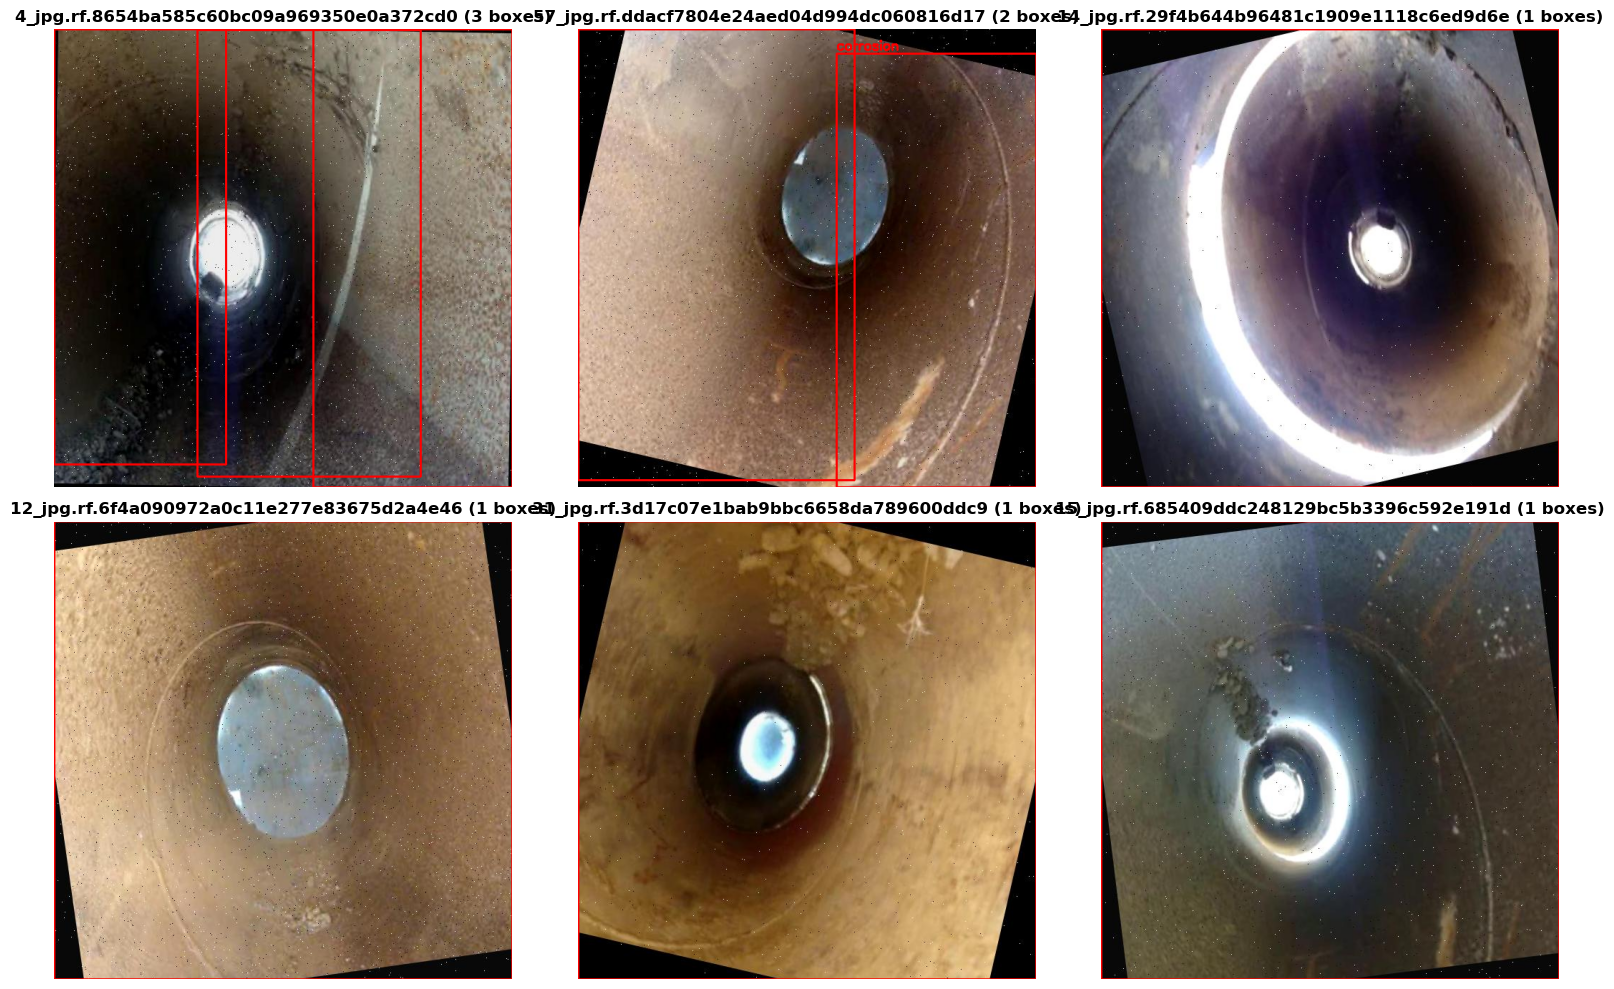

In [38]:
# ============================================
# VISUAL VERIFICATION CELL (INLINE DISPLAY)
# ============================================
import random
import cv2
import matplotlib.pyplot as plt
from pathlib import Path

def show_random_samples(coco_json_path, num_samples=6):
    with open(coco_json_path, 'r') as f:
        coco_data = json.load(f)

    images = coco_data['images']
    annotations = coco_data['annotations']
    categories = {c['id']: c['name'] for c in coco_data['categories']}

    # Create lookup of annotations per image
    img_to_anns = defaultdict(list)
    for ann in annotations:
        img_to_anns[ann['image_id']].append(ann)

    # Randomly sample images
    samples = random.sample(images, min(num_samples, len(images)))

    plt.figure(figsize=(16, 10))
    for idx, img_info in enumerate(samples):
        img_path = Path(img_info.get("path", "")) or Path(img_info["file_name"])
        if not img_path.exists():
            continue

        img = cv2.imread(str(img_path))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        anns = img_to_anns[img_info["id"]]

        # Draw bounding boxes
        for ann in anns:
            x, y, w, h = map(int, ann["bbox"])
            cat_name = categories.get(ann["category_id"], "corrosion")

            color = (255, 0, 0)  # red for corrosion
            cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
            cv2.putText(img, cat_name, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

        plt.subplot(2, (num_samples + 1) // 2, idx + 1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"{Path(img_info['file_name']).stem} ({len(anns)} boxes)")

    plt.tight_layout()
    plt.show()

# Example usage
show_random_samples("data/processed/unified/unified_annotations.json", num_samples=6)


In [39]:
# ============================================
# QUICK FOLDER STRUCTURE INSPECTOR
# ============================================
import os
from pathlib import Path

def print_folder_structure(base_dir=".", max_depth=4):
    """
    Recursively prints folder structure up to a given depth.
    Skips hidden files/folders for clarity.
    """
    base_path = Path(base_dir).resolve()
    print(f"\n📂 Folder structure for: {base_path}")
    print("=" * 60)

    def recurse(current_path, depth):
        if depth > max_depth:
            return
        indent = "│   " * depth
        for item in sorted(current_path.iterdir()):
            if item.name.startswith("."):
                continue  # skip hidden stuff
            if item.is_dir():
                print(f"{indent}📁 {item.name}/")
                recurse(item, depth + 1)
            else:
                print(f"{indent}📄 {item.name}")

    recurse(base_path, 0)
    print("=" * 60)

# Example usage
if __name__ == "__main__":
    print_folder_structure("..", max_depth=4)



📂 Folder structure for: C:\Users\Blue\corrosion_detection\src
📁 data/
│   📄 01_eda_and_split.ipynb
│   📁 data/
│   │   📁 organized/
│   │   │   📁 bmvc_corrosion/
│   │   │   │   📁 annotations/
│   │   │   │   📄 cls_annotations.json
│   │   │   │   📁 images/
│   │   │   │   📄 mapping.json
│   │   │   📁 github_datasets/
│   │   │   │   📁 annotations/
│   │   │   │   📄 cls_annotations.json
│   │   │   │   📁 images/
│   │   │   │   📄 mapping.json
│   │   │   📁 kaggle_pipeline/
│   │   │   │   📁 annotations/
│   │   │   │   📄 cls_annotations.json
│   │   │   │   📁 images/
│   │   │   │   📄 mapping.json
│   │   │   📁 roboflow_corrosao/
│   │   │   │   📁 annotations/
│   │   │   │   📄 cls_annotations.json
│   │   │   │   📁 images/
│   │   │   │   📄 mapping.json
│   │   │   📁 roboflow_inpipe/
│   │   │   │   📁 annotations/
│   │   │   │   📄 cls_annotations.json
│   │   │   │   📁 images/
│   │   │   │   📄 mapping.json
│   │   │   📁 test_samples/
│   │   │   │   📁 annotations/
│   │   │   │   📄